In [3]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *

In [4]:
path = untar_data(URLs.IMAGEWOOF); path.ls()

(#2) [/home/lgvaz/.fastai/data/imagewoof/val,/home/lgvaz/.fastai/data/imagewoof/train]

In [2]:
dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                   splitter=GrandparentSplitter(valid_name='val'),
                   get_items=get_image_files,
                   get_y=lambda x: x)

In [8]:
class TestTfm(Transform):
  def encodes(self, x:TensorImage):
    return 255*x

In [6]:
dbunch = dblock.databunch(
  path/'train', 
  bs=64,
  item_tfms=[RandomResizedCrop(128)],
  batch_tfms=[*aug_transforms(), Normalize(*imagenet_stats)])

In [9]:
type(xb)

fastai2.torch_core.TensorImage

In [10]:
type(yb)

fastai2.torch_core.TensorImage

In [7]:
xb, yb = dbunch.one_batch()

In [11]:
x_img = xb[0].permute(1, 2, 0).cpu()
y_img = yb[0].permute(1, 2, 0).cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


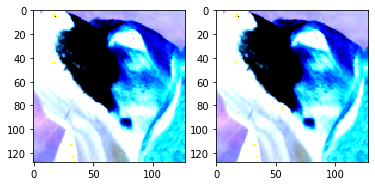

In [12]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(x_img); axs[1].imshow(y_img)

In [48]:
dbunch??

In [50]:
dbunch.show_batch??

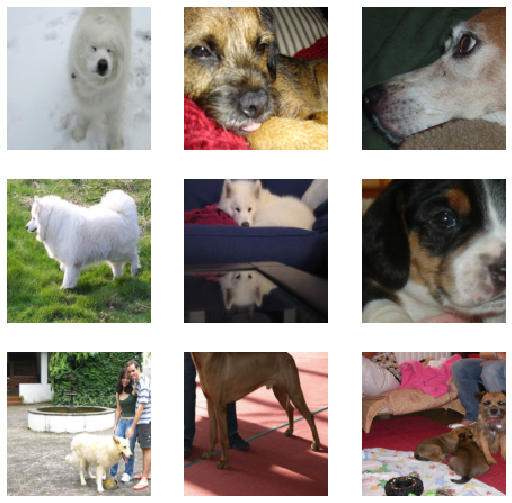

In [85]:
dbunch.show_batch()

In [29]:
xb,yb = dbunch.one_batch()

In [30]:
xb.shape

torch.Size([64, 3, 128, 128])

In [31]:
yb.shape

torch.Size([64, 3, 128, 128])

In [18]:
img = dbunch.decode_batch((xb, yb))

In [22]:
img[0].show()

AttributeError: 'tuple' object has no attribute 'show'